# Guide to `Binary` systems

In [1]:
from astropy import units as u
import numpy as np
import sed_analysis_tools as st

# Assumed filter system
filter_set = st.FilterSet(list_pivot_wavelengths=np.logspace(3.2, 4.7, 16) * u.Angstrom)
print(filter_set.list_pivot_wavelengths)

[ 1584.89319246  1995.26231497  2511.88643151  3162.27766017
  3981.07170553  5011.87233627  6309.5734448   7943.28234724
 10000.         12589.25411794 15848.93192461 19952.62314969
 25118.8643151  31622.77660168 39810.71705535 50118.72336273] Angstrom


## Creating Binary object

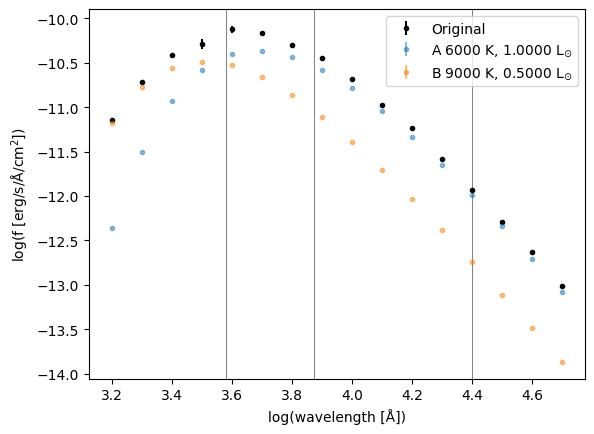

In [2]:
filter_set = st.FilterSet(list_pivot_wavelengths=np.logspace(3.2, 4.7, 16) * u.Angstrom)

binary = st.Binary(
    T_A=6000 * u.K,
    T_B=9000 * u.K,
    L_A=1 * u.solLum,
    L_B=0.5 * u.solLum,
    frac_err=0.05,
    seed=2,
    D=10 * u.pc,
    filter_set=filter_set,
    name="AB",
)
binary.plot()

## Fitting blackbody models and plotting

### Single component fit

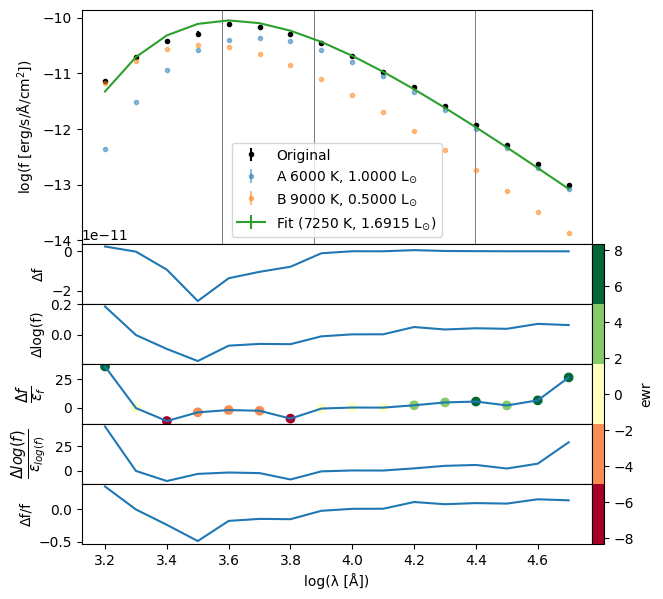

In [3]:
binary.fit_bb_Single()
binary.plot_fitted(mode="Single")

### Double component fit

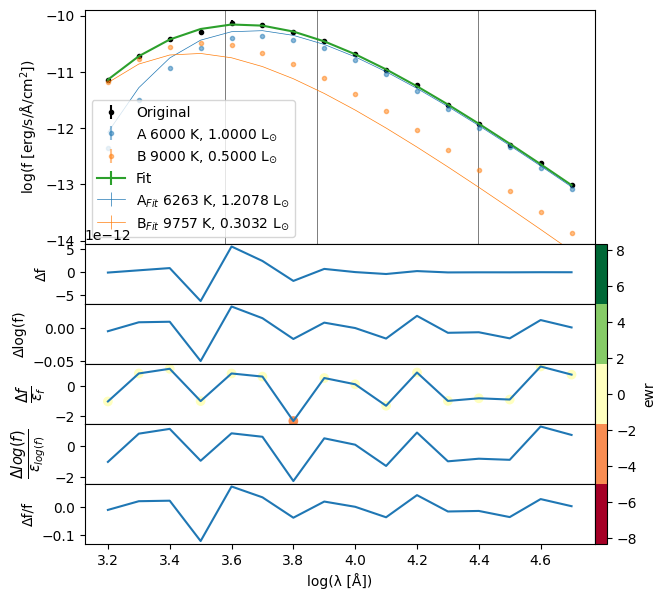

In [4]:
binary.fit_bb_Double(use_priors=True)
binary.plot_fitted(mode="Double")

## Error and recoverability analysis

### Monte carlo error estimation

AB
-----
T_in  = [6000.000000]	 [9000.000000]
L_in  = [1.000000]	 [0.500000]
T_fit = [5996.627852 +216.314098-235.169107]	[8983.583524 +451.462188-329.338993]
L_fit = [1.002577 +0.159029-0.148573]	[0.495155 +0.150798-0.138485]
Convergence rate:1.00


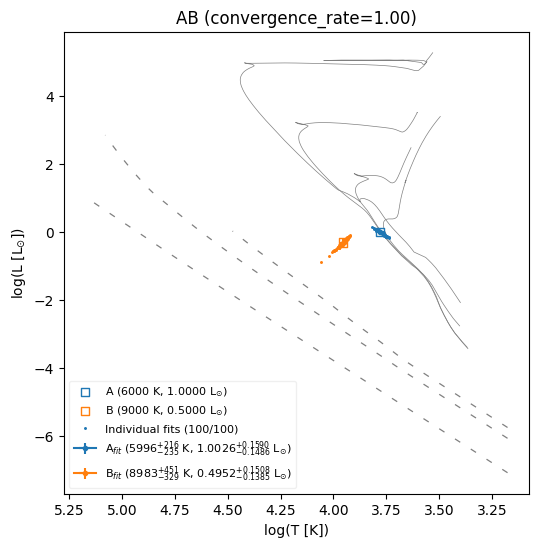

In [5]:
binary.estimate_errors(niter=100, verbose=True, threshold_primary_match=0.10)
binary.plot_estimated_errors()

### Recoverability of occurate parameters
- using a grid of pseudo-secondaries near the B compoent's HRD position
- None of the far away pseudo-secondaries should mimic the B component in the HRD


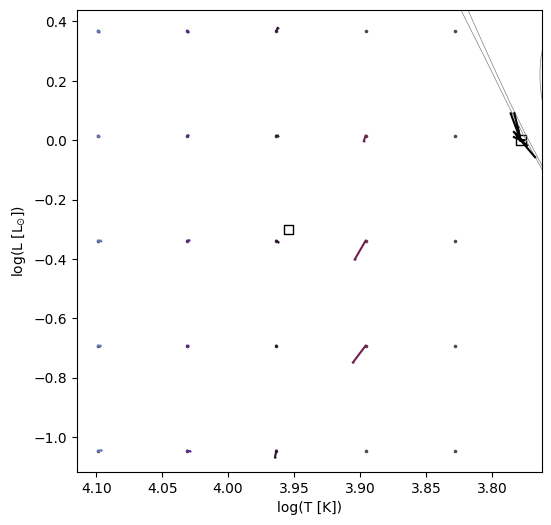

In [6]:
binary.evaluate_pseudo_secondaries(grid_size=5, niter=100, refit=False)
binary.plot_pseudo_secondaries()

### Combined plot

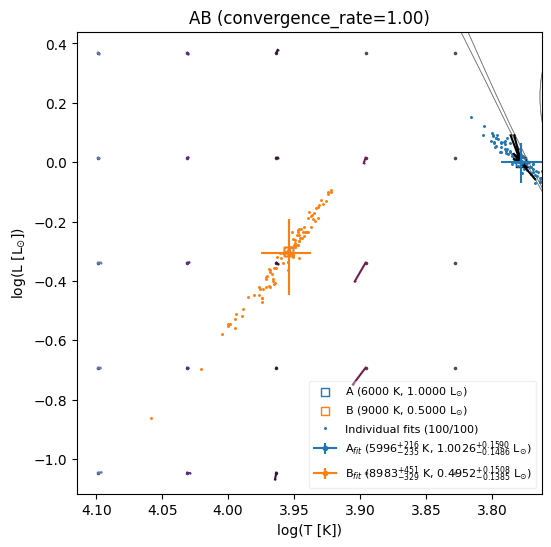

In [7]:
binary.plot_error_and_pseudo_secondaries()

# Analysis of real binaries

WOCS2002
--------
T_in  = [5250.000000]	 [14750.000000]
L_in  = [18.000000]	 [0.093000]
T_fit = [5247.735616 +28.367891-30.143021]	[14766.376248 +2650.823336-1819.997442]
L_fit = [17.953317 +0.180461-0.207411]	[0.092202 +0.042894-0.025599]
Convergence rate:1.00


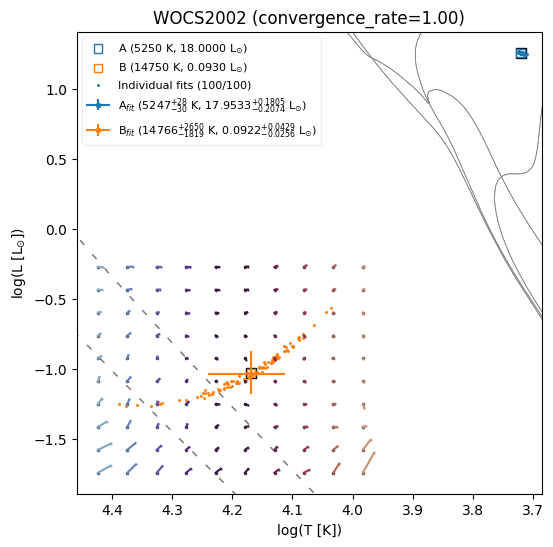

In [8]:
import warnings
warnings.filterwarnings("ignore")

'''
Stellar parameters and flux error values are taken from the WOCS2002 star in M67. 
'''

frac_err = [
    0.05341997, 0.05986721, 0.05341997, 0.02632069, 0.06585393,
    0.00377348, 0.06585393, 0.00276771, 0.00400373, 0.06585393,
    0.00806181, 0.02026275, 0.01842068, 0.01657861, 0.01934171,
    0.01657861, 0.03499929,
]
x = np.array([
    3.17055506, 3.18780264, 3.20628604, 3.36236302, 3.63921512,
    3.70206419, 3.72967016, 3.7651012 , 3.88195269, 3.90857131,
    3.93339412, 4.09166696, 4.22063102, 4.33425264, 4.52538174,
    4.6630221 , 5.06298789,
])
filter_set = st.FilterSet(list_pivot_wavelengths=10**x * u.Angstrom)
WOCS2002 = st.Binary(
    T_A=5250 * u.K,
    L_A=18 * u.solLum,
    T_B=14750 * u.K,
    L_B=0.0930 * u.solLum,
    frac_err=frac_err,
    seed=2,
    D=10 * u.pc,
    filter_set=filter_set,
    name="WOCS2002",
)
WOCS2002.estimate_errors(niter=100, verbose=True, threshold_primary_match=0.10)
WOCS2002.evaluate_pseudo_secondaries(grid_size=10, niter=100, refit=False)
WOCS2002.plot_error_and_pseudo_secondaries()

WOCS6022
--------
T_in  = [6250.000000]	 [15250.000000]
L_in  = [3.900000]	 [0.004000]
T_fit = [6248.079087 +55.240118-60.159605]	[10697.728712 +15435.569729-2621.206711]
L_fit = [3.871235 +0.027875-0.061318]	[0.011816 +0.078092-0.009069]
Convergence rate:0.29


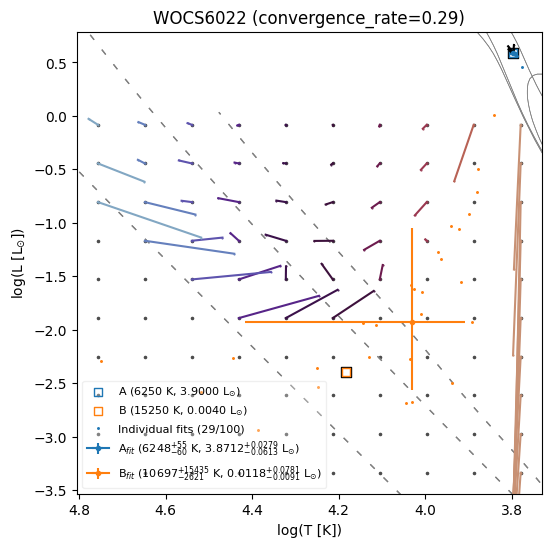

In [9]:
'''
Stellar parameters and flux error values are taken from the WOCS6022 star in M67. 
'''
frac_err = [
       0.11973442, 0.11973442, 0.02486792, 0.02302585, 0.01565758,
       0.0058596 , 0.00384279, 0.00441559, 0.0044849 , 0.00407437,
       0.18696991, 0.00500789, 0.00503038, 0.00531034, 0.00555243,
       0.00574088, 0.00851752, 0.00080766, 0.00080397, 0.00602147,
       0.00582179, 0.00569675, 0.0058333 , 0.00406159, 0.005807  ,
       0.00552801, 0.00558459, 0.00554189, 0.00531678, 0.00548177,
       0.00506979, 0.00487892, 0.00472433, 0.00474433, 0.01749965,
       0.00075697, 0.00075137, 0.00431381, 0.00392895, 0.00362299,
       0.00326196, 0.00333563, 0.00326418, 0.00313196, 0.00318977,
       0.00304362, 0.00307255, 0.003144  , 0.00319828, 0.00327633,
       0.0033039 , 0.00360087, 0.00335565, 0.00365031, 0.00376557,
       0.00389125, 0.00400811, 0.0040805 , 0.00418774, 0.00421027,
       0.00447786, 0.004972  , 0.00532831, 0.00182683, 0.0056491 ,
       0.00584375, 0.00587035, 0.00096199, 0.00640621, 0.00723591,
       0.00313366, 0.01842068, 0.02026275, 0.01934171, 0.02071304,
       0.02425417, 0.24591609, 0.39880774
]
x = np.array([
       3.17055506, 3.20628604, 3.31888766, 3.35122191, 3.42840504,
       3.60321457, 3.61362852, 3.6146239 , 3.62423003, 3.6333031 ,
       3.63339145, 3.63410048, 3.64477525, 3.6546022 , 3.66356118,
       3.67250403, 3.67413556, 3.67472485, 3.67655363, 3.68147125,
       3.69118293, 3.69942974, 3.70770064, 3.71093565, 3.71665957,
       3.72456406, 3.73214055, 3.74049179, 3.7485045 , 3.75661172,
       3.76426518, 3.77229991, 3.77885694, 3.7865519 , 3.7882478 ,
       3.7919847 , 3.79281957, 3.79300697, 3.80018805, 3.80687208,
       3.81314242, 3.81998232, 3.82023771, 3.82690262, 3.83317632,
       3.83984289, 3.84559957, 3.85256872, 3.85803464, 3.86402166,
       3.87014934, 3.87514528, 3.88075973, 3.88762222, 3.89253317,
       3.89806601, 3.90345218, 3.90923061, 3.91467934, 3.92004577,
       3.92482289, 3.92987988, 3.93437563, 3.93501118, 3.93996292,
       3.94538848, 3.95000739, 3.95135135, 3.9543327 , 3.95892194,
       3.98104513, 4.09166696, 4.22063102, 4.33425264, 4.52538174,
       4.6630221 , 5.06298789, 5.34416229
])
filter_set = st.FilterSet(list_pivot_wavelengths=10**x * u.Angstrom)
WOCS6022 = st.Binary(
    T_A=6250 * u.K,
    L_A=3.9 * u.solLum,
    T_B=15250 * u.K,
    L_B=0.004 * u.solLum,
    frac_err=frac_err,
    seed=2,
    D=10 * u.pc,
    filter_set=filter_set,
    name="WOCS6022",
)
WOCS6022.estimate_errors(niter=100, verbose=True, threshold_primary_match=0.10)
WOCS6022.evaluate_pseudo_secondaries(grid_size=10, niter=100, refit=False)
WOCS6022.plot_error_and_pseudo_secondaries()

WOCS12010
---------
T_in  = [6250.000000]	 [11000.000000]
L_in  = [2.800000]	 [0.023000]
T_fit = [6222.247080 +133.150639-255.476913]	[10291.795409 +9791.212685-2565.928765]
L_fit = [2.731571 +0.072074-0.288561]	[0.025637 +0.339565-0.021425]
Convergence rate:0.50


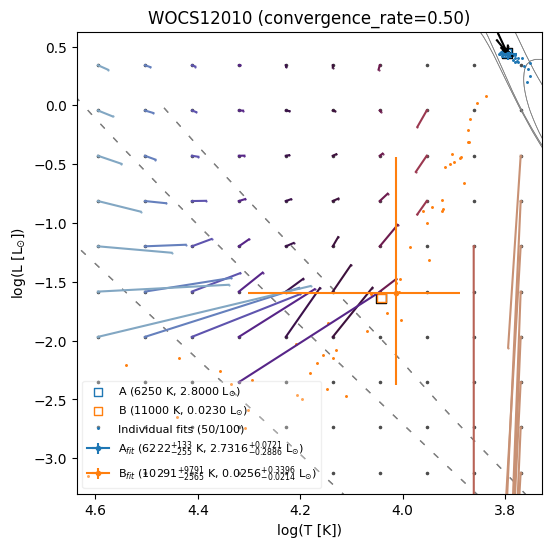

In [10]:
'''
Stellar parameters and flux error values are taken from the WOCS12010 star in M67. 
'''
frac_err = [
        0.14736545, 0.20262749, 0.14736545, 0.00921034, 0.00921034,
        0.00644724, 0.01381551, 0.44780675, 0.00640698, 0.00456946,
        0.00474791, 0.00477423, 0.00455403, 0.06723548, 0.00529965,
        0.44780675, 0.00547381, 0.00589467, 0.00616723, 0.00654381,
        0.00091225, 0.00091064, 0.00692396, 0.00672395, 0.00656999,
        0.00681815, 0.00472486, 0.00669393, 0.00655255, 0.03407826,
        0.00682425, 0.44780675, 0.00646443, 0.00641906, 0.00663619,
        0.0059233 , 0.00568793, 0.00555747, 0.00556699, 0.02947309,
        0.00516419, 0.0045756 , 0.00422393, 0.00370187, 0.00367897,
        0.00360057, 0.00347306, 0.00349483, 0.00350976, 0.00360754,
        0.00374697, 0.00384526, 0.00401906, 0.00407334, 0.00444411,
        0.00417696, 0.00461041, 0.00471624, 0.00481233, 0.00497033,
        0.00503035, 0.0052776 , 0.00532085, 0.00559503, 0.00603671,
        0.0063745 , 0.00220677, 0.00703291, 0.00751991, 0.0076441 ,
        0.00112587, 0.00830093, 0.00919135, 0.00367703, 0.02118378,
        0.02118378, 0.01657861, 0.01981808, 0.02681035, 0.40709704,
        0.44780675
]
x = np.array([
        3.17055506, 3.18780264, 3.20628604, 3.31888766, 3.35122191,
        3.42840504, 3.5466511 , 3.55035709, 3.60321457, 3.61362852,
        3.6146239 , 3.62423003, 3.6333031 , 3.63339145, 3.63410048,
        3.64043485, 3.64477525, 3.6546022 , 3.66356118, 3.67250403,
        3.67472485, 3.67655363, 3.68147125, 3.69118293, 3.69942974,
        3.70770064, 3.71093565, 3.71665957, 3.72456406, 3.73189906,
        3.73214055, 3.73779467, 3.74049179, 3.7485045 , 3.75661172,
        3.76426518, 3.77229991, 3.77885694, 3.7865519 , 3.7882478 ,
        3.79300697, 3.80018805, 3.80687208, 3.81314242, 3.81998232,
        3.82023771, 3.82690262, 3.83317632, 3.83984289, 3.84559957,
        3.85256872, 3.85803464, 3.86402166, 3.87014934, 3.87514528,
        3.88075973, 3.88762222, 3.89253317, 3.89806601, 3.90345218,
        3.90923061, 3.91467934, 3.92004577, 3.92482289, 3.92987988,
        3.93437563, 3.93501118, 3.93996292, 3.94538848, 3.95000739,
        3.95135135, 3.9543327 , 3.95892194, 3.98104513, 4.09166696,
        4.22063102, 4.33425264, 4.52538174, 4.6630221 , 5.06298789,
        5.34416229
])
filter_set = st.FilterSet(list_pivot_wavelengths=10**x * u.Angstrom)

WOCS12010 = st.Binary(
    T_A=6250 * u.K,
    L_A=2.8 * u.solLum,
    T_B=11000 * u.K,
    L_B=0.023 * u.solLum,
    frac_err=frac_err,
    seed=2,
    D=10 * u.pc,
    filter_set=filter_set,
    name="WOCS12010",
)
WOCS12010.estimate_errors(niter=100, verbose=True, threshold_primary_match=0.10)
WOCS12010.evaluate_pseudo_secondaries(grid_size=10, niter=100, refit=False)
WOCS12010.plot_error_and_pseudo_secondaries()